<a href="https://colab.research.google.com/github/roberto7781/MachineLearningClass/blob/main/Week_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Roberto Oscadinata - 2301853956

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [40]:
#Importing Data From the CSV File

data = pd.read_csv("listings.csv")
print(data)

            id  ... availability_365
0        49091  ...              365
1        50646  ...              365
2        56334  ...              365
3        71609  ...              353
4        71896  ...              355
...        ...  ...              ...
7902  38105126  ...               61
7903  38108273  ...              365
7904  38109336  ...              173
7905  38110493  ...               30
7906  38112762  ...              365

[7907 rows x 16 columns]


In [41]:
#To Check Data Types and Check Whether it Have Any Null Value or Not

print(data.dtypes)
print(data.isna().values.any())

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
True


In [43]:
#Data Cleanup Because in the Dataset it Stated that Minimum Nights Couldn't be above 365 Days
data = data[data['minimum_nights']<=365]


In [44]:
#Data Cleanup Because there are Null Value in reviews_per_month Column
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [45]:
#Converting Categorical Data into Numerical Data

data['room_type'].unique()

mappings={'Entire home/apt':1,'Private room':2,'Shared room':3}
data['room_type']=data['room_type'].map(mappings)

In [46]:
#Converting Categorical Data into Numerical Data
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
number.fit(data['neighbourhood'])
data['neighbourhood'] = number.transform(data['neighbourhood'])

number.fit(data['neighbourhood_group'])
data['neighbourhood_group'] = number.transform(data['neighbourhood_group'])

number.fit(data['room_type'])
data['room_type'] = number.transform(data['room_type'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7904 entries, 0 to 7906
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       7904 non-null   int64  
 1   neighbourhood_group             7904 non-null   int64  
 2   neighbourhood                   7904 non-null   int64  
 3   price                           7904 non-null   int64  
 4   minimum_nights                  7904 non-null   int64  
 5   number_of_reviews               7904 non-null   int64  
 6   calculated_host_listings_count  7904 non-null   int64  
 7   availability_365                7904 non-null   int64  
 8   reviews_per_month               7904 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 617.5 KB
   room_type  neighbourhood_group  ...  availability_365  reviews_per_month
0          1                    2  ...               365               0.01
1          1       

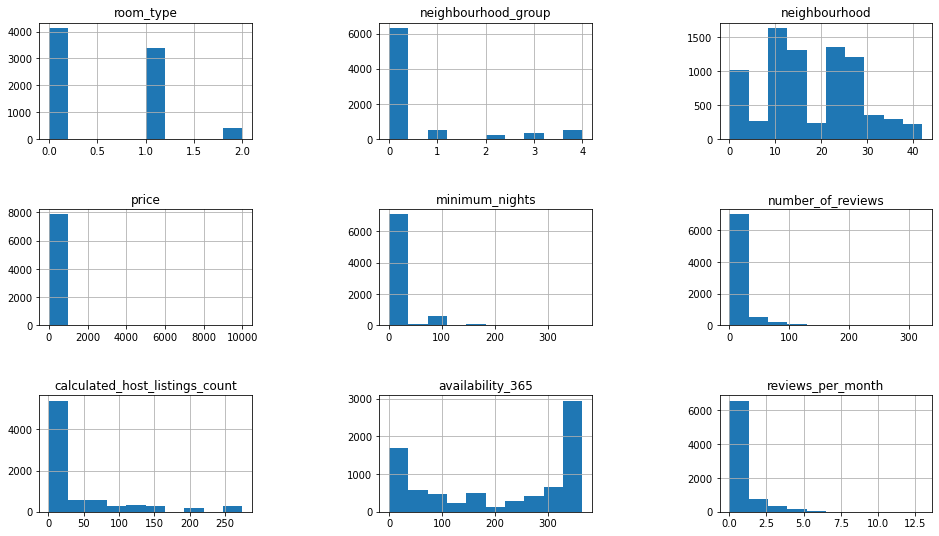

In [47]:
#Creating a New Dataframe for Linear Regression

newData = data[["room_type", "neighbourhood_group", "neighbourhood", "price", "minimum_nights", "number_of_reviews",  "calculated_host_listings_count", "availability_365", "reviews_per_month"]]
newData.info()
print(newData.head())
newData.hist()
plt.subplots_adjust(hspace = 0.6, wspace = 0.6)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [48]:
#Trainning Our Model

train, test = train_test_split(newData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["number_of_reviews", "minimum_nights", "availability_365", "price"]], train["reviews_per_month"])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [ 2.58176859e-02 -2.79248945e-03 -3.63276841e-04 -6.77016693e-06]
Intercept:  0.47801540773652496


In [49]:
#Printing Out The Score of Our Model

predictions = regression.predict(test[["number_of_reviews","minimum_nights", "availability_365", "price"]])

print("MAE : ", mean_absolute_error(test[["reviews_per_month"]], predictions))
print("MSE : ", mean_squared_error(test[["reviews_per_month"]], predictions))
print("R2 : ", r2_score(test[["reviews_per_month"]], predictions))

MAE :  0.48783059348655017
MSE :  0.6529461657990447
R2 :  0.48328529776009765
